1. How many records are present in the dataset? Print the metadata information of the dataset.

In [ ]:
#having issue
#sometimes the output doesn't come of the visualization ones, so kindly execute only this code again. after that the output comes correctly.

#Importing
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('bollywood.csv') 

In [54]:
print("Number of records:", len(df))

print("Metadata Information:")
df.info()

Number of records: 149
Metadata Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SlNo                 149 non-null    int64  
 1   Release Date         149 non-null    object 
 2   MovieName            149 non-null    object 
 3   ReleaseTime          149 non-null    object 
 4   Genre                149 non-null    object 
 5   Budget               149 non-null    int64  
 6   BoxOfficeCollection  149 non-null    float64
 7   YoutubeViews         149 non-null    int64  
 8   YoutubeLikes         149 non-null    int64  
 9   YoutubeDislikes      149 non-null    int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 11.8+ KB


2. How many movies got released in each genre? Which genre had highest number of releases? Sort number of releases in each genre in descending order.

In [55]:
genre_counts = df['Genre'].value_counts()

most_released_genre = genre_counts.idxmax()
most_released_count = genre_counts.max()

print("Number of movies released in each genre (sorted):\n")
print(genre_counts)

print("Genre with the highest number of releases:")
print(f"{most_released_genre} ({most_released_count} movies)")

Number of movies released in each genre (sorted):

Genre
Comedy      36
Drama       35
Thriller    29
Romance     25
Action      24
Name: count, dtype: int64
Genre with the highest number of releases:
Comedy (36 movies)


3. How many movies in each genre got released in different release times like long weekend, festive season, etc. (Note: Do a cross tabulation between Genre and ReleaseTime.)

In [56]:
genre_release_crosstab = pd.crosstab(df['Genre'], df['ReleaseTime'])

print("Movies released by Genre and Release Time:")
print(genre_release_crosstab)

Movies released by Genre and Release Time:
ReleaseTime  FS  HS  LW   N
Genre                      
Action        3   3   3  15
Comedy        3   5   5  23
Drama         4   6   1  24
Romance       3   3   4  15
Thriller      4   1   2  22


4. Which month of the year, maximum number movie releases are seen ? (Note: Extract a new column called month from ReleaseDate column.)

In [63]:
df['Release Date'] = pd.to_datetime(df['Release Date'], errors='coerce')

df['ReleaseMonth'] = df['Release Date'].dt.month_name()

month_counts = df['ReleaseMonth'].value_counts()

print("Movie releases by month:\n")
print(month_counts)

most_common_month = month_counts.idxmax()
print(f"\nThe month with the maximum movie releases is: {most_common_month}")

Movie releases by month:

ReleaseMonth
January      20
March        19
May          18
July         16
February     16
April        11
June         10
September    10
November     10
October       9
August        8
December      2
Name: count, dtype: int64

The month with the maximum movie releases is: January


5. Which month of the year typically sees most releases of high budgeted movies, that is, movies with budget of 25 crore or more?

In [65]:
df['ReleaseDate'] = pd.to_datetime(df['Release Date'], format='%d-%b-%y', errors='coerce')

df['ReleaseMonth'] = df['ReleaseDate'].dt.month_name()

high_budget_df = df[df['Budget'] >= 25]

high_budget_month_counts = high_budget_df['ReleaseMonth'].value_counts()

print("High-budget movie releases by month:\n")
print(high_budget_month_counts)

most_common_high_budget_month = high_budget_month_counts.idxmax()
print(f"The month with the most high-budget movie releases is: **{most_common_high_budget_month}**")

High-budget movie releases by month:

ReleaseMonth
February     9
January      8
August       7
March        7
November     6
July         6
June         5
September    5
April        4
October      4
May          3
December     2
Name: count, dtype: int64
The month with the most high-budget movie releases is: **February**


6. Which are the top 10 movies with maximum return on investment (ROI)? Calculate return on investment (ROI) as (BoxOfficeCollection - Budget) / Budget.

In [66]:
df = df[df['Budget'].notnull() & df['BoxOfficeCollection'].notnull()]

df['ROI'] = (df['BoxOfficeCollection'] - df['Budget']) / df['Budget']

top_10_roi = df[['MovieName', 'ROI']].sort_values(by='ROI', ascending=False).head(10)

print("Top 10 Movies with Maximum ROI:")
print(top_10_roi.reset_index(drop=True))

Top 10 Movies with Maximum ROI:
                   MovieName       ROI
0                 Aashiqui 2  8.166667
1                         PK  7.647059
2                Grand Masti  7.514286
3               The Lunchbox  7.500000
4                     Fukrey  6.240000
5                   Mary Kom  5.933333
6                     Shahid  5.666667
7  Humpty Sharma Ki Dulhania  5.500000
8         Bhaag Milkha Bhaag  4.466667
9            Chennai Express  4.266667


7. Do the movies have higher ROI if they get released on festive seasons or long weekend? Calculate the average ROI for different release times.

In [67]:
df = df[df['Budget'].notnull() & df['BoxOfficeCollection'].notnull()]

df['ROI'] = (df['BoxOfficeCollection'] - df['Budget']) / df['Budget']

average_roi_by_time = df.groupby('ReleaseTime')['ROI'].mean().sort_values(ascending=False)

print("Average ROI by Release Time:")
print(average_roi_by_time)

Average ROI by Release Time:
ReleaseTime
LW    1.127205
FS    0.973853
HS    0.850867
N     0.657722
Name: ROI, dtype: float64


8. Draw a histogram and a distribution plot to find out the distribution of movie budgets. Interpret the plot to conclude if the most movies are high or low budgeted movies.

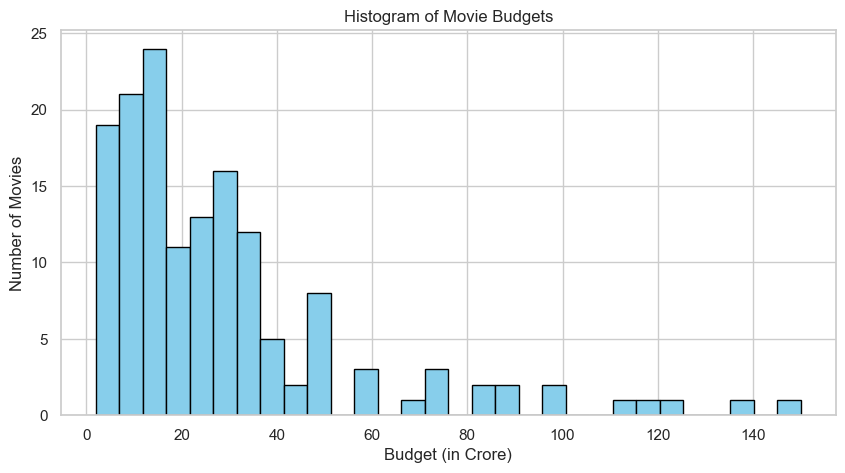

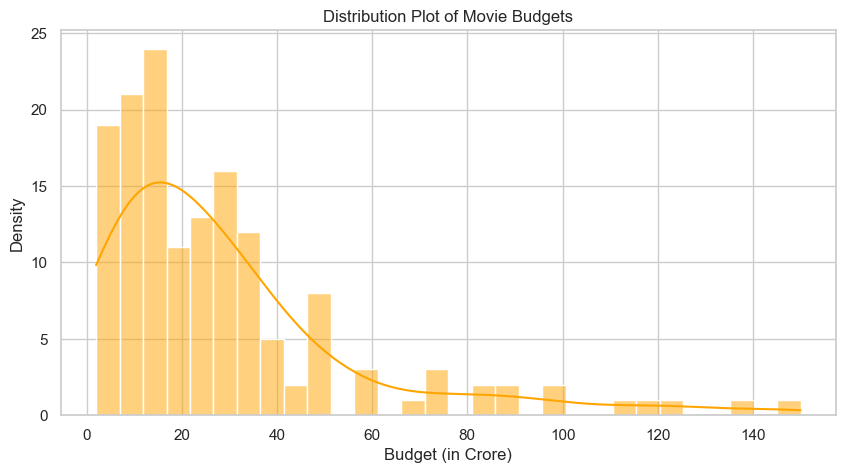

In [68]:
df = df[df['Budget'].notnull()]

sns.set(style="whitegrid")

plt.figure(figsize=(10, 5))
plt.hist(df['Budget'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Movie Budgets')
plt.xlabel('Budget (in Crore)')
plt.ylabel('Number of Movies')
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(df['Budget'], kde=True, color='orange', bins=30)
plt.title('Distribution Plot of Movie Budgets')
plt.xlabel('Budget (in Crore)')
plt.ylabel('Density')
plt.show()


9. Compare the distribution of ROIs between movies with comedy genre and drama. which genre typically sees higher ROIs?

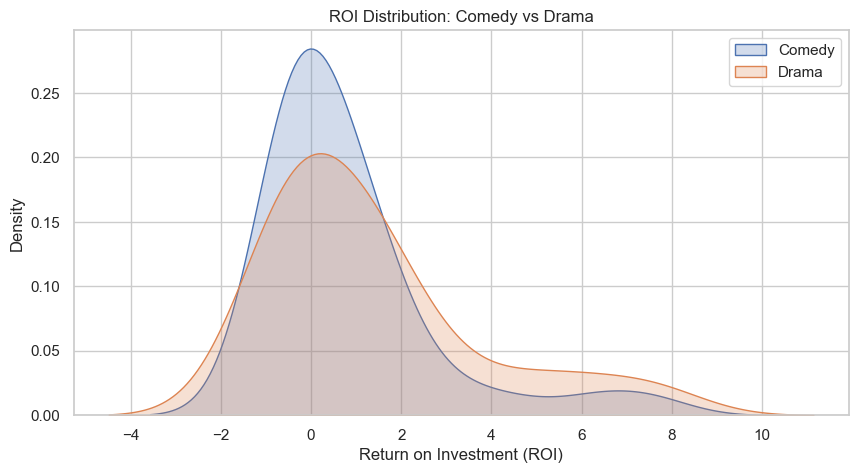

In [69]:
df['ROI'] = (df['BoxOfficeCollection'] - df['Budget']) / df['Budget']

comedy_roi = df[df['Genre'] == 'Comedy']['ROI']
drama_roi = df[df['Genre'] == 'Drama']['ROI']

plt.figure(figsize=(10, 5))
sns.kdeplot(comedy_roi, label='Comedy', fill=True)
sns.kdeplot(drama_roi, label='Drama', fill=True)
plt.title('ROI Distribution: Comedy vs Drama')
plt.xlabel('Return on Investment (ROI)')
plt.ylabel('Density')
plt.legend()
plt.show()

10. Is there a corelation between box office collection and YouTube likes? Is the correlation positive or negative?

In [70]:
df_clean = df[['BoxOfficeCollection', 'YoutubeLikes']].dropna()

correlation = df_clean['BoxOfficeCollection'].corr(df_clean['YoutubeLikes'])

print("Correlation between BoxOfficeCollection and YoutubeLikes:", correlation)

if correlation > 0:
    print("The correlation is positive.")
elif correlation < 0:
    print("The correlation is negative.")
else:
    print("There is no correlation.")

Correlation between BoxOfficeCollection and YoutubeLikes: 0.6825165877731297
The correlation is positive.


11. Which genre of movies typically sees more YouTube likes? Draw boxplots for each genre of movies to compare.

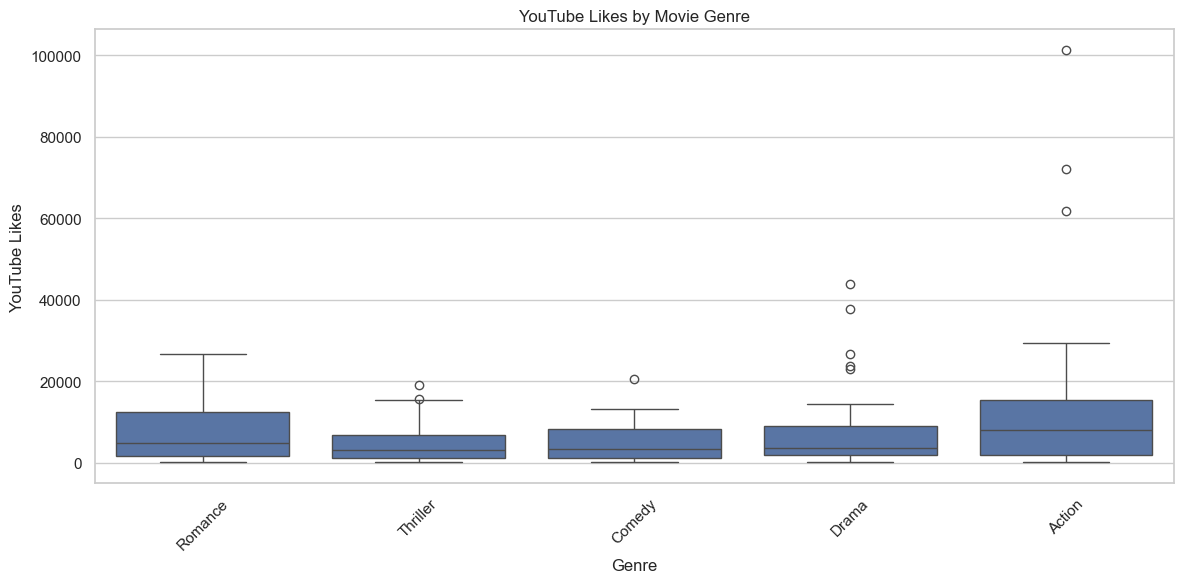

In [71]:
df = df[['Genre', 'YoutubeLikes']].dropna()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Genre', y='YoutubeLikes', data=df)
plt.title('YouTube Likes by Movie Genre')
plt.xlabel('Genre')
plt.ylabel('YouTube Likes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

12. Which of the variables among Budget, BoxOfficeCollection, YouTubeView, YouTubeLikes, YouTubeDislikes are highly correlated? Note: Draw pair plot

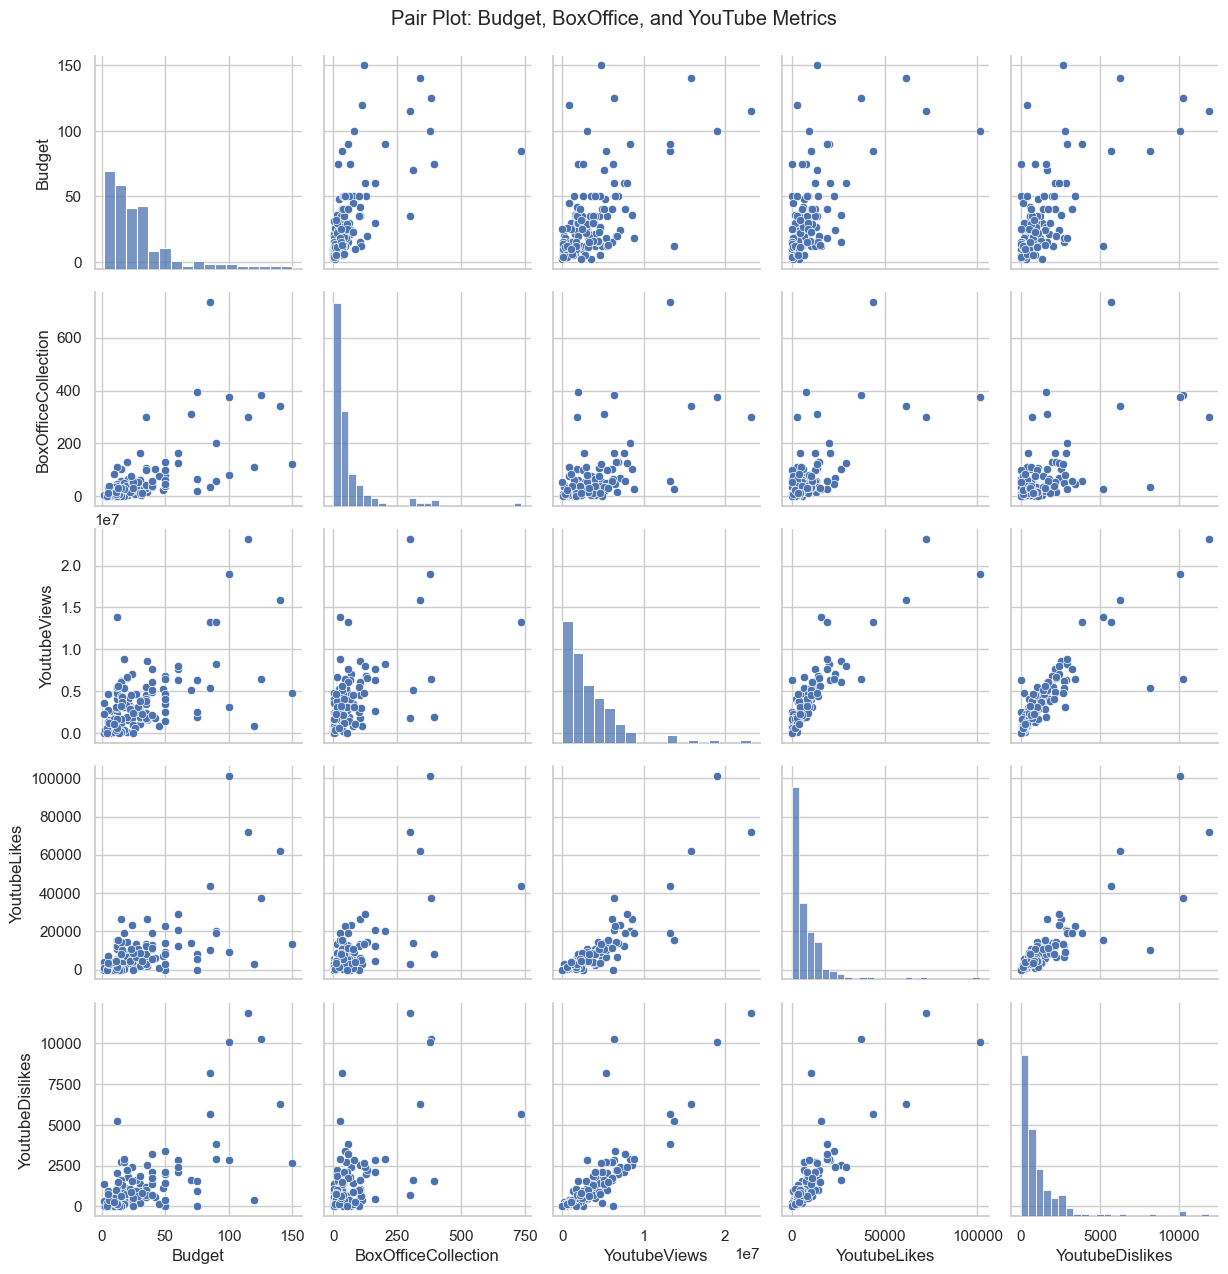

In [75]:
cols = ['Budget', 'BoxOfficeCollection', 'YoutubeViews', 'YoutubeLikes', 'YoutubeDislikes']

# Select the columns (without dropping NA explicitly)
df_selected = df[cols]

# Draw the pair plot
sns.pairplot(df_selected)
plt.suptitle("Pair Plot: Budget, BoxOffice, and YouTube Metrics", y=1.02)
plt.show()